<a href="https://colab.research.google.com/github/yusufdalva/TensorFlow_Practice/blob/master/callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Callbacks example using MNIST dataset with Tensorflow
This notebook demonstrates the usage of callbacks in training. A simple CNN is constructed. This code is written by modeling the assignment in https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=BLMdl9aP8nQ0.

 The only intention is practice.

### Importing and checking Tensorflow version
Import statement for tensorflow and version check.

In [ ]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)

2.3.0


## Importing MNIST dataset
This notebook uses MNIST dataset for demonstration purposes. The following part shows the import and preprocessing for the dataset

In [ ]:
mnist_dataset = tf.keras.datasets.fashion_mnist
(train_samples, train_labels), (test_samples, test_labels) = mnist_dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Data format of the dataset is shown below:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("Training samples dimensions: ", train_samples.shape)
print("Training labels dimensions: ", train_labels.shape)
print("Test samples dimensions: ", test_samples.shape)
print("Test labels dimensions: ", test_labels.shape)

Training samples dimensions:  (60000, 28, 28)
Training labels dimensions:  (60000,)
Test samples dimensions:  (10000, 28, 28)
Test labels dimensions:  (10000,)


In [ ]:
print("Data sample dimensions: ", train_samples.shape[1:])
assert train_samples.shape[1:] == test_samples.shape[1:] # Assertion to prove the equality of dimensions in test samples and training samples
print("Training sample count: ", train_samples.shape[0])
print("Test sample count: ", test_samples.shape[0])

Data sample dimensions:  (28, 28)
Training sample count:  60000
Test sample count:  10000


### Data Sample
To show the task, one random data sample from training set is selected with its corresponding label

Label of the data sample:  5


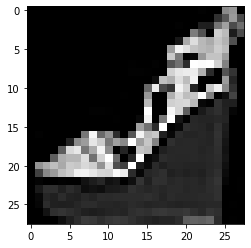

In [ ]:
import random
random.seed(1) # For consistency in different runs
random_idx = int(random.random() * train_samples.shape[0]) # Corresponds to the index of a training example
data_sample, data_label = train_samples[random_idx], train_labels[random_idx]
print('Label of the data sample: ', data_label)
plt.imshow(data_sample, cmap = 'gray')

### Data Normalization
To reduce the variance in both test and training set, normalization applied  (Min-max feature scaling) The normalization formula is as follows:</br></br>
$\large{X' = \frac{X - X_{min}}{X_{max}}}$</br></br>
Note that minimum pixel value is 0 and maximum pixel value is 255 here

In [ ]:
train_samples = train_samples / 255.0
test_samples = test_samples / 255.0

#Model
In the model here, there are no convolutional layers included as it is just an entry level example. The neural network model here will consist of 2 fully connected layers, which one has 256 neurons and the other has 128 neurons as an example. For the classification, as this is a multi-class classification problem, **softmax** activation has been used for 10 neurons (10 = # of classes)

In [ ]:
X_in = tf.keras.layers.Input(shape = train_samples.shape[1:]) # Input layer
X = tf.keras.layers.Flatten()(X_in)
X = tf.keras.layers.Dense(units = 256, activation = 'relu')(X)
X = tf.keras.layers.Dense(units = 128, activation = 'relu')(X)
out = tf.keras.layers.Dense(units = 10, activation = 'softmax')(X) # Output layer
model = tf.keras.Model(inputs = X_in, outputs = out)

## Compile the model
After constructing the model, the desired metrics to observe during training (**metrics**), the loss function for training (**loss**) and the optimization algorithm is needed to be specified (**optimizer**). The following metrics has been selected:
- **Optimizer: Adam Optimizer**, to make use of moving average and momentum
- **Loss: Sparse Categorical Crossentropy**, the task is multiclass classification and the labels are not in the form of one-hot vector </br>(eg. for label 2, one-hot vector representation is: $\begin{bmatrix}0&0&1&0&...&0&0\end{bmatrix}$)
- **Metrics: Accuracy**, to keep track of training accuracy

In [ ]:
epoch_count = 20
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# Training the model with training samples and labels -- training for 20 epochs
history = model.fit(x = train_samples, y = train_labels, epochs = epoch_count)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2715 - accuracy: 0.8994
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9033
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2448 - accuracy: 0.9079
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2351 - accuracy: 0.9106
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2235 - accuracy: 0.9159
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2181 - accuracy: 0.9167
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9213
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2039 - accuracy: 0.9220
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1941 - accuracy: 0.9269
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.186

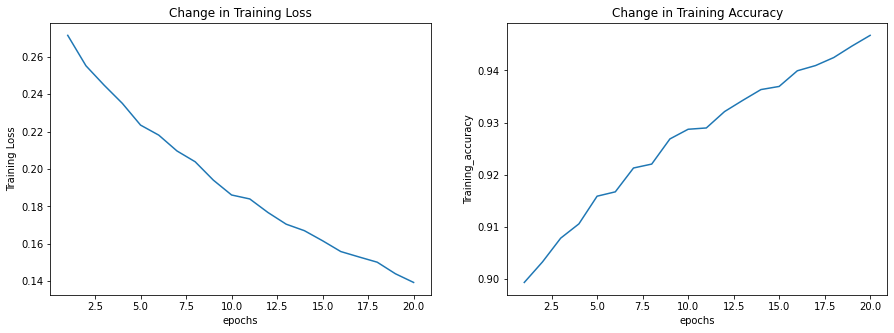

In [ ]:
# Visualizing the changes in training loss and training accuracy values
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(range(1,epoch_count + 1), history.history['loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Change in Training Loss')
ax[1].plot(range(1,epoch_count + 1), history.history['accuracy'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Training_accuracy')
ax[1].set_title('Change in Training Accuracy')
fig.show()

## Evaluating the model
Now with the test data, the model will be evaluated with prediction accuracy. 


In [ ]:
eval = model.evaluate(test_samples, test_labels)
print('Testing loss: ', eval[0])
print('Testing accuracy: ', eval[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8811
Testing loss:  0.33757445216178894
Testing accuracy:  0.8810999989509583


## Adding a Callback
To have more control in training, a callback is defined while fitting the model. In this notebook, the callback function described does two things. They are:
- At the end of each epoch, prints a summary of the epoch.
- Stops training if loss is less than 0.15

In [ ]:
class controlCallbakck(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        print("\nFor epoch " + str(epoch) + ", loss is " + str(logs.get('loss')) + " and accuracy is " + str(logs.get('accuracy')))
        if logs.get('loss') < 0.15:
            print("Loss too low, stopping training...")
            self.model.stop_training = True

callback = controlCallbakck()
X_in = tf.keras.layers.Input(shape = train_samples.shape[1:]) # Input layer
X = tf.keras.layers.Flatten()(X_in)
X = tf.keras.layers.Dense(units = 256, activation = 'relu')(X)
X = tf.keras.layers.Dense(units = 128, activation = 'relu')(X)
out = tf.keras.layers.Dense(units = 10, activation = 'softmax')(X) # Output layer
model = tf.keras.Model(inputs = X_in, outputs = out)
epoch_count = 30
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x = train_samples, y = train_labels, epochs = epoch_count, callbacks = [callback], verbose = 0)


For epoch 0, loss is 0.4806281328201294 and accuracy is 0.8281333446502686

For epoch 1, loss is 0.36074966192245483 and accuracy is 0.8667500019073486

For epoch 2, loss is 0.32502463459968567 and accuracy is 0.8802666664123535

For epoch 3, loss is 0.300992488861084 and accuracy is 0.887499988079071

For epoch 4, loss is 0.28268513083457947 and accuracy is 0.8939833045005798

For epoch 5, loss is 0.26982632279396057 and accuracy is 0.8982833623886108

For epoch 6, loss is 0.25688281655311584 and accuracy is 0.9022833108901978

For epoch 7, loss is 0.24549917876720428 and accuracy is 0.906499981880188

For epoch 8, loss is 0.23386915028095245 and accuracy is 0.9112833142280579

For epoch 9, loss is 0.228058859705925 and accuracy is 0.9133166670799255

For epoch 10, loss is 0.2202303111553192 and accuracy is 0.9168000221252441

For epoch 11, loss is 0.21005438268184662 and accuracy is 0.9193666577339172

For epoch 12, loss is 0.20374664664268494 and accuracy is 0.9226666688919067

For

### Evaluating the model in terms of accuracy
In the following, the model which the training is interrupted early due to the loss is evaluated in terms of accuracy.

In [ ]:
eval = model.evaluate(test_samples, test_labels)
print('Testing loss: ', eval[0])
print('Testing accuracy: ', eval[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8913
Testing loss:  0.4310731589794159
Testing accuracy:  0.8913000226020813
